### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

# Импорт необходимых библиотек и модулей
Этот блок подготавливает окружение для работы с моделью компьютерного зрения. В нём производится импорт всех нужных компонентов:

1. Sequential из tensorflow.keras.models — класс для создания модели нейронной сети прямого распространения.

2. Dense и Flatten из tensorflow.keras.layers — компоненты нейросети: полносвязные слои и преобразование формы входных данных.

3. Adam из tensorflow.keras.optimizers — оптимизатор, ускоряющий и стабилизирующий процесс обучения.

4. utils из tensorflow.keras — вспомогательные функции, включая to_categorical для кодирования меток.

5. image из tensorflow.keras.preprocessing — модуль для загрузки и предобработки изображений.

6. numpy — библиотека для работы с массивами.

7. matplotlib.pyplot — библиотека для визуализации данных.

8. os — модуль для работы с файловой системой.

9. warnings — используется для подавления не критичных предупреждений во время выполнения.

10. %matplotlib inline — директива Jupyter Notebook для отображения графиков прямо в ноутбуке.



In [5]:
# Стандартная библиотека
import os
import warnings
import zipfile  # работа с zip-архивами

# Внешние библиотеки
import gdown
import matplotlib.pyplot as plt
import numpy as np

# TensorFlow / Keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Скрытие предупреждений
warnings.filterwarnings('ignore')

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

#  Загрузка датасета из облака
В этом блоке производится автоматическая загрузка архива с изображениями для обучения модели:

Вызов gdown.download(...) загружает архив hw_light.zip из облачного хранилища Yandex Cloud, содержащий изображения для классификации

In [6]:
# Загрузка файла
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

**Распаковка архива**
Открывается ZIP-архив с именем hw_light.zip в режиме чтения.
Затем все файлы из архива извлекаются в папку hw_light.
Если папка hw_light не существует, она создаётся автоматическ

In [7]:
# Распаковываем архив hw_light.zip в папку hw_light
with zipfile.ZipFile('hw_light.zip', 'r') as zip_ref:
    zip_ref.extractall('hw_light')

# Загрузка и разметка изображений из датасета
В этом блоке осуществляется чтение изображений из локальной директории и формирование обучающего набора данных:

1. base_dir = '/content/hw_light' — путь к распакованному датасету, содержащему папки с изображениями разных геометрических фигур.

2. x_train — список, в который будут добавлены изображения в виде массивов.

3. y_train — список меток классов, соответствующих типам фигур.

4. img_height и img_width — задаются размеры изображений для приведения всех картинок к одному формату (20×20 пикселей).

Цикл по папкам:
Каждая папка соответствует одному классу:

1. '0' — метка 0 (например, треугольники),

2. '3' — метка 1 (например, круги),

3. Остальные — метка 2 (например, квадраты).

Изображения загружаются функцией load_img, преобразуются в массивы (img_to_array) и добавляются в x_train.

Метки добавляются в y_train согласно имени папки.

В завершении массивы x_train и y_train преобразуются в формат NumPy для последующей подачи в модель. И выводятся размеры получившихся массивов.

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (302, 20, 20, 1)
Размер массива y_train (302,)


# Подготовка данных: нормализация и кодирование меток
В этом блоке выполняется предобработка обучающих данных перед подачей в нейронную сеть. Выполнияет нормалицазацию изображений.

Выполняется добавление размерности канала и One-hot кодирование меток.

In [ ]:
# Преобразуем тип данных и нормируем:
x_train = x_train.astype('float32') / 255.0
if len(x_train.shape) == 3:
    x_train = np.expand_dims(x_train, axis=-1)

# Преобразуем y_train в one-hot вектор для 3 классов
y_train = utils.to_categorical(y_train, 3)

# Обучение модели
В этом блоке создаётся функция net_model, которая строит, обучает и тестирует нейронную сеть с различными комбинациями параметров.

Функция net_model(neurons, activation_f, batch_s):
- neurons — количество нейронов в скрытом слое;

- activation_f — тип функции активации в скрытом слое ('relu' или 'linear');

- batch_s — размер пакета (batch size) при обучении.

Архитектура модели:
- Flatten — преобразует вход из 2D (20×20) в 1D-вектор.

- Dense(neurons, activation) — скрытый слой с заданным количеством нейронов и функцией активации.

- Dense(3, activation='softmax') — выходной слой на 3 нейрона для классификации трёх классов фигур, с активацией softmax.

Обучение модели:
1. Модель компилируется с функцией потерь categorical_crossentropy и оптимизатором Adam.

2. Обучается 10 эпох с заданным batch_size.

3. После обучения выводится итоговая точность (accuracy) на обучающем наборе.

Перебор комбинаций:
Выполняется запуск функции 18 раз с различными значениями:

- Число нейронов: 10, 100, 5000

- Активации: 'relu', 'linear'

- Batch size: 10, 100, 1000

In [ ]:
def net_model(neurons, activation_f, batch_s):
  """
  Создание сети по параметрам.
  """
  # Теперь создадим нейронную сеть
  model = Sequential()
  model.add(Flatten(input_shape=(20, 20, 1)))
  model.add(Dense(neurons, activation=activation_f))

  # Выходной слой на 3 нейрона (по числу классов) с softmax-активацией
  model.add(Dense(3, activation='softmax'))

  # Компиляция модели
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Обучение
  history = model.fit(x_train, y_train, epochs=10, batch_size=batch_s, verbose=1)
  # Смотрим итоговую точность
  train_acc = history.history['accuracy'][-1]
  print('Для модели с: нейронов =', neurons, 'активацией:', activation_f, 'батчами =', batch_s)
  print(f"Точность: {train_acc:.3f}")

net_model(10, 'relu', 10)
net_model(10, 'relu', 100)
net_model(10, 'relu', 1000)
net_model(10, 'linear', 10)
net_model(10, 'linear', 100)
net_model(10, 'linear', 1000)
net_model(100, 'relu', 10)
net_model(100, 'relu', 100)
net_model(100, 'relu', 1000)
net_model(100, 'linear', 10)
net_model(100, 'linear', 100)
net_model(100, 'linear', 1000)
net_model(5000, 'relu', 10)
net_model(5000, 'relu', 100)
net_model(5000, 'relu', 1000)
net_model(5000, 'linear', 10)
net_model(5000, 'linear', 100)
net_model(5000, 'linear', 1000)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3629 - loss: 1.2128
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5228 - loss: 1.0288
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 0.9620
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.8923
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6314 - loss: 0.8502
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.7790
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.7280
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.6644
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.6678
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.5831
Для модели с: нейронов = 10 активацией: relu батчами = 10
Точность: 0.818
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.2530 - loss: 1.6200


# Вывод по заданию
После обучения сетей была составлена сравнительная характеристика точности каждой сети.

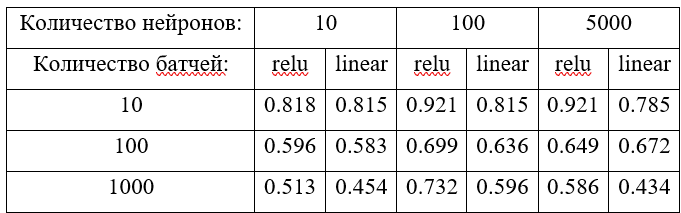

Исходя из данных таблицы, самым оптимальным вариантом была бы сеть с количеством нейронов 5000, функцией активации «relu» и количеством батчей равным 10. Увеличение количества батчей не ведет к улучшению свойств сети, функция активации «relu» справилась с данной задачей лучше, чем «linear», чем больше нейронов у сети, тем лучше ее параметры.